<a href="https://colab.research.google.com/github/yasarigno/NLP_DeepLearning_Course/blob/main/Exercise_Neural_Networks_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [ ]:
bad_pizza_dataset = pd.DataFrame.from_dict(
    {
    'tomato_sauce': ['no', 'no', 'yes', 'yes'],
    'barbecue_sauce': ['no', 'yes', 'no', 'yes'],
    'result': ['sauce error', 'good', 'good', 'sauce error']
    }
)

In [ ]:
bad_pizza_dataset['c_tomato_sauce'] = bad_pizza_dataset['tomato_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_barbecue_sauce'] = bad_pizza_dataset['barbecue_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_result'] = bad_pizza_dataset['result'].apply(lambda x: 1 if x == 'sauce error' else 0)

In [ ]:
bad_pizza_dataset

,tomato_sauce,barbecue_sauce,result,c_tomato_sauce,c_barbecue_sauce,c_result
0,no,no,sauce error,0,0,1
1,no,yes,good,0,1,0
2,yes,no,good,1,0,0
3,yes,yes,sauce error,1,1,1


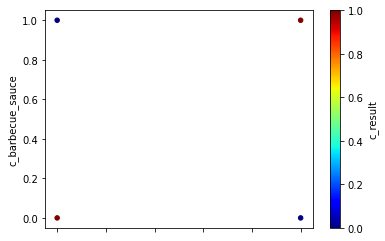

In [ ]:
bad_pizza_dataset.plot(
    kind='scatter',
    x='c_tomato_sauce',
    y='c_barbecue_sauce',
    c='c_result',
    colormap='jet'
)

In [ ]:
input_layer = Dense(units=2, input_dim=2, activation='sigmoid')

output_layer = Dense(units=1, activation='sigmoid')

In [ ]:
input_layer = Dense(units=2, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

bad_pizza_model = Sequential()

bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)

sgd = SGD()

bad_pizza_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
bad_pizza_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result'], 
    epochs=3000,
)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step - loss: 0.7341 - accuracy: 0.5000
Epoch 112/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.7338 - accuracy: 0.5000
Epoch 113/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.7335 - accuracy: 0.5000
Epoch 114/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.7332 - accuracy: 0.5000
Epoch 115/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.7329 - accuracy: 0.5000
Epoch 116/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.7326 - accuracy: 0.5000
Epoch 117/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.7323 - accuracy: 0.5000
Epoch 118/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.7320 - accuracy: 0.5000
Epoch 119/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.7317 - accuracy: 0.5000
Epoch 120/3000
1/1 [==============================] - 0s 8ms/

In [ ]:
test_loss, test_acc = bad_pizza_model.evaluate(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 [==============================] - 0s 150ms/step - loss: 0.6936 - accuracy: 0.5000
Evaluation result on Test Data : Loss = 0.6936439275741577, accuracy = 0.5


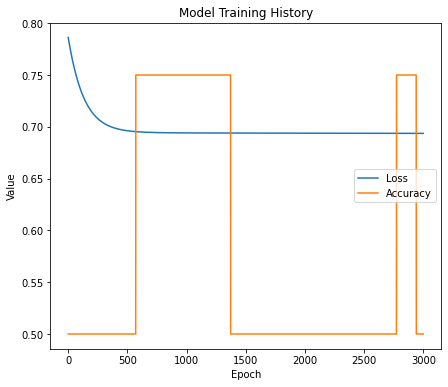

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

Loss moves slowly down, meaning that the model is learning; however, training is going very slowly - the learning rate could be too small. It could even be stuck. Let's try increasing the learning rate!

In [ ]:
input_layer = Dense(units=2, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

bad_pizza_model = Sequential()

bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)

high_lr_sgd = SGD(learning_rate=10)

bad_pizza_model.compile(loss='binary_crossentropy', optimizer=high_lr_sgd, metrics=['accuracy'])

bad_pizza_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
high_lr_model_history = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result'], 
    epochs=3000
)

Streaming output truncated to the last 5000 lines.
Epoch 245/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.5000
Epoch 246/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.5000
Epoch 247/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.5000
Epoch 248/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.5000
Epoch 249/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3496 - accuracy: 0.5000
Epoch 250/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3496 - accuracy: 0.5000
Epoch 251/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3496 - accuracy: 0.5000
Epoch 252/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3496 - accuracy: 0.5000
Epoch 253/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.3496 - accuracy: 0.5000
Epoch 254/3000
1/1 [=============================

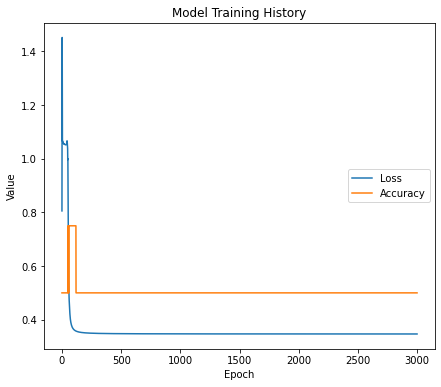

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(high_lr_model_history.history['loss'])
plt.plot(high_lr_model_history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

Instead of loss slowly reducing, it increased initially, signifying that the learning rate parameter is too large, which could make loss jump up or get stuck again.

In [ ]:
input_layer = Dense(units=3, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

bad_pizza_model = Sequential()
bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)

sgd = SGD(learning_rate=1)

bad_pizza_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

bad_pizza_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 9         
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_model = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result'], 
    epochs=3000
)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 1.0000
Epoch 502/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0452 - accuracy: 1.0000
Epoch 503/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0449 - accuracy: 1.0000
Epoch 504/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 505/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 506/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0443 - accuracy: 1.0000
Epoch 507/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0440 - accuracy: 1.0000
Epoch 508/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0438 - accuracy: 1.0000
Epoch 509/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0436 - accuracy: 1.0000
Epoch 510/3000
1/1 [==============================] - 0s 6ms/st

In [ ]:
test_loss, test_acc = bad_pizza_model.evaluate(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 [==============================] - 0s 163ms/step - loss: 0.0026 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.002628723159432411, accuracy = 1.0


The model is now predicting correctly and in the chart below you can see how it finally converged:

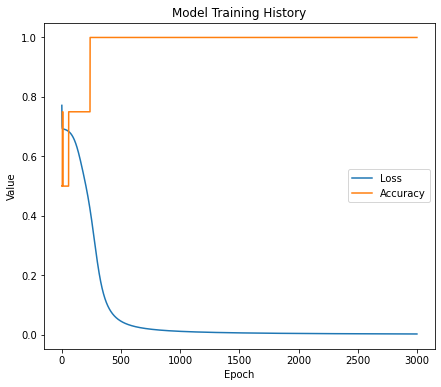

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()